# Generalised Regression

In this notebook, we will build a generalised regression model on the **electricity consumption** dataset. The dataset contains two variables - year and electricity consumption.

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [2]:
#fetching data
elec_cons = pd.read_csv("total-electricity-consumption-us.csv",  sep = ',', header= 0 )
elec_cons.head(20)

,Year,Consumption
0,1920,57125
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651
5,1925,85513
6,1926,95164
7,1927,102404
8,1928,109150
9,1929,117914


In [3]:
# number of observations: 51
elec_cons.shape

(51, 2)

In [4]:
# checking NA
# there are no missing values in the dataset
elec_cons.isnull().values.any()

False

In [5]:
size = len(elec_cons.index)
index = range(0, size, 5) #predefiened via index, multiple of 5 is test data

train = elec_cons[~elec_cons.index.isin(index)]
test = elec_cons[elec_cons.index.isin(index)]


In [6]:
print(len(train))
print(len(test))

40
11


In [7]:
train

,Year,Consumption
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651
6,1926,95164
7,1927,102404
8,1928,109150
9,1929,117914
11,1931,110467
12,1932,100353


In [8]:
test

,Year,Consumption
0,1920,57125
5,1925,85513
10,1930,115783
15,1935,120124
20,1940,181706
25,1945,275028
30,1950,396346
35,1955,633078
40,1960,848723
45,1965,1157442


In [9]:
train.shape

(40, 2)

In [10]:
# converting X to a two dimensional array, as required by the learning algorithm
X_train = train.Year.values.reshape(-1,1) #Making X two dimensional
y_train = train.Consumption

X_test = test.Year.values.reshape(-1,1) #Making X two dimensional
y_test = test.Consumption

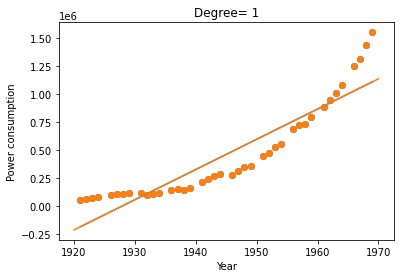

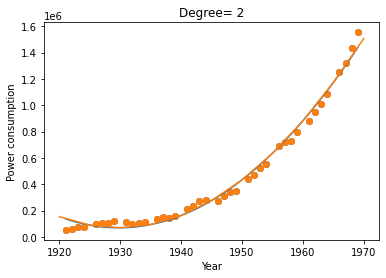

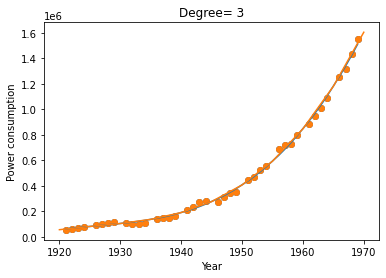

In [11]:
# Doing a polynomial regression: Comparing linear, quadratic and cubic fits
# Pipeline helps you associate two models or objects to be built sequentially with each other, 
# in this case, the objects are PolynomialFeatures() and LinearRegression()

r2_train = []
r2_test = []
degrees = [1, 2, 3]

for degree in degrees:
    pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=degree)),
                     ('model', LinearRegression())])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2_test.append(metrics.r2_score(y_test, y_pred))
    
    # training performance
    y_pred_train = pipeline.predict(X_train)
    r2_train.append(metrics.r2_score(y_train, y_pred_train))
    
# plot predictions and actual values against year
    fig, ax = plt.subplots()
    ax.set_xlabel("Year")                                
    ax.set_ylabel("Power consumption")
    ax.set_title("Degree= " + str(degree))
    
    # train data in blue
    ax.scatter(X_train, y_train)
    ax.plot(X_train, y_pred_train)
    
    # test data
    ax.scatter(X_train, y_train)
    ax.plot(X_test, y_pred)
    
    plt.show()

In [12]:
# respective test r-squared scores of predictions
print(degrees)
print(r2_train)
print(r2_test)

[1, 2, 3]
[0.8423747402176137, 0.9908896744553596, 0.9979789883760531]
[0.816517046382681, 0.9876080502675472, 0.9984898437914501]


In [13]:
a1*f(x1) + a2 * f2(x2)

a1^2

NameError: name 'a1' is not defined